# Supervised Learning with SVMs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
df=pd.read_csv(url)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


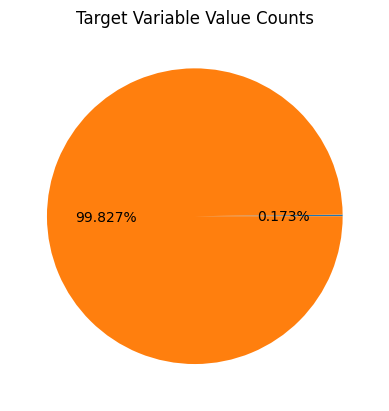

In [14]:
fraud = np.sum(df['Class'] == 1) / df['Class'].shape[0]
Fine = np.sum(df['Class'] == 0) / df['Class'].shape[0]
proportions = [fraud, Fine]

plt.pie(proportions, autopct='%1.3f%%')
plt.title('Target Variable Value Counts')
plt.show()

<Axes: >

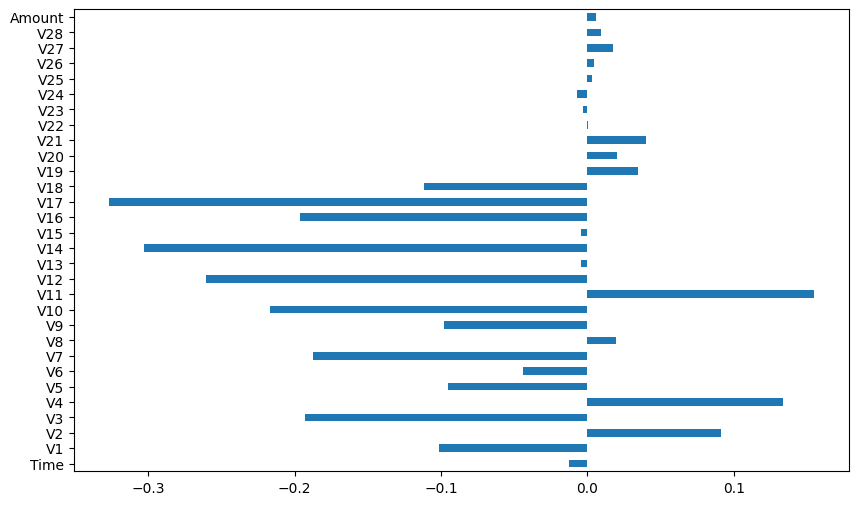

In [15]:
cor_values = df.corr()['Class'].drop('Class')
cor_values.plot(kind='barh', figsize=(10,6))

In [16]:
X = df.iloc[:,1:30]
y = df.iloc[:,-1]

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = normalize(X, norm='l1')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Build a Decision Tree Classifier model with Scikit-Learn
使用 Scikit-Learn 建立決策樹分類器模型¶
Compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset.

In [21]:
w_train = compute_sample_weight('balanced', y_train)

In [24]:
dt = DecisionTreeClassifier(
    max_depth=8,
    random_state=42
)
dt.fit(X_train, y_train, sample_weight=w_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Build a Support Vector Machine model with Scikit-Learn¶

In [25]:
svm = LinearSVC(class_weight='balanced', random_state=42, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [31]:
yPred_dt = dt.predict_proba(X_test)[:,1]
yPred_dt

array([0.9942469 , 0.02525429, 0.02525429, ..., 0.02525429, 0.        ,
       0.02525429])

In [34]:
roc_auc_dt = roc_auc_score(y_test, yPred_dt)
roc_auc_dt

0.9346222449850679

In [37]:
yPred_svm = svm.decision_function(X_test)
yPred_svm

array([24.56335288, -0.4296316 , -1.05983946, ..., -0.51281055,
       -0.26505389, -0.99173178])

In [39]:
roc_auc_svm = roc_auc_score(y_test, yPred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986
